In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

2022-03-29 18:51:13.589500: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-29 18:51:13.589527: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.8.0'

In [2]:
df = pd.read_csv('data/kc_house_data.csv', delimiter = ',', encoding='ISO-8859-1')

In [3]:
df['date'] = pd.to_datetime(df.date, format = '%Y%m%dT%H%M%S')

df = df.sort_values(by='date')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
# Verificando o numero de amostras (linhas) e features (colunas) do dataset. 
print('Amostras e Features:', df.shape)

Amostras e Features: (21613, 21)


In [7]:
# Verificando quais são os tipos das features
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 16768 to 16594
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   

Text(0, 0.5, 'Price')

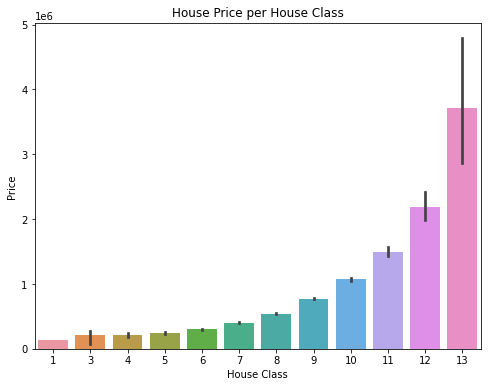

In [9]:
plt.figure(figsize=(8,6))

sns.barplot(x='grade',y='price', data=df)
plt.title('House Price per House Class')
plt.xlabel('House Class')
plt.ylabel('Price')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

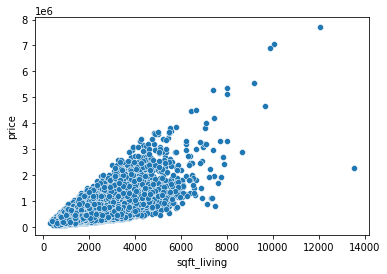

In [10]:
#looking for outliers. the one in the bottom right we should probably eliminate
sns.scatterplot(x='sqft_living', y='price', data=df)

In [11]:
df[df.sqft_living > 10000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
3914,9808700762,2014-06-11,7062500.0,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [12]:
df = df[df.sqft_living < 13000]

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

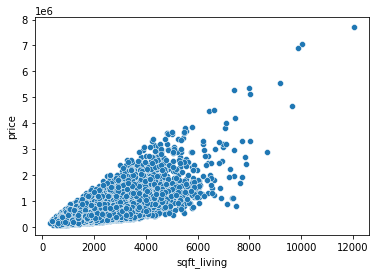

In [13]:
sns.scatterplot(data=df, x='sqft_living', y='price')

<AxesSubplot:>

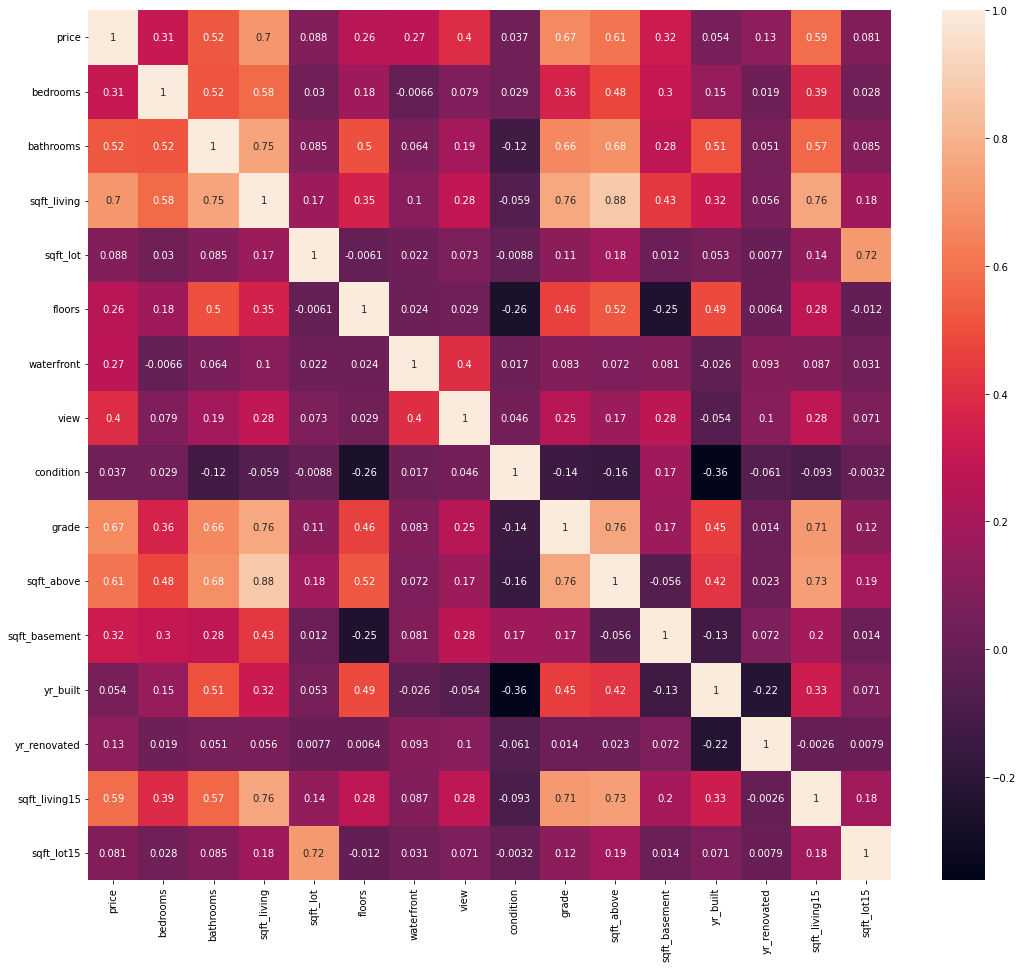

In [14]:
numeric_collumns = df.copy().drop(columns=['id', 'date', 'lat', 'long', 'zipcode'])

plt.figure(figsize=(18,16))

sns.heatmap(numeric_collumns.corr(), annot=True)

In [15]:
#newer homes should impact the value
df['year'] = df['date'].apply(lambda date: date.year) 
#Some months see greater home sales and may have a large impact on price
df['month'] = df.date.apply(lambda date: date.month) 

<AxesSubplot:xlabel='month', ylabel='price'>

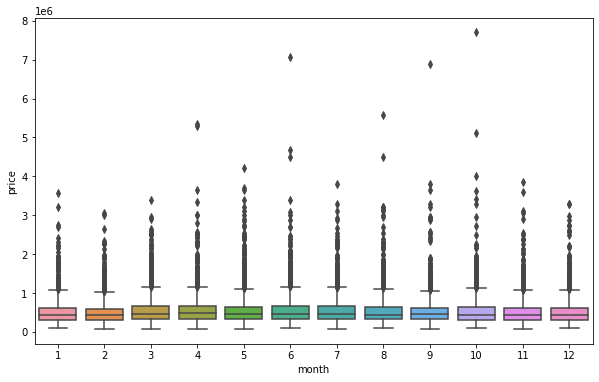

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df)

In [17]:
df.drop('date', axis=1, inplace=True)

In [18]:
# time to deal with those zipcodes, some zipcodes will 
# positively impact price, some negatively, so lets 
# create dummy variables
zipcode=['zipcode'] 
df = pd.get_dummies(df,columns=zipcode)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

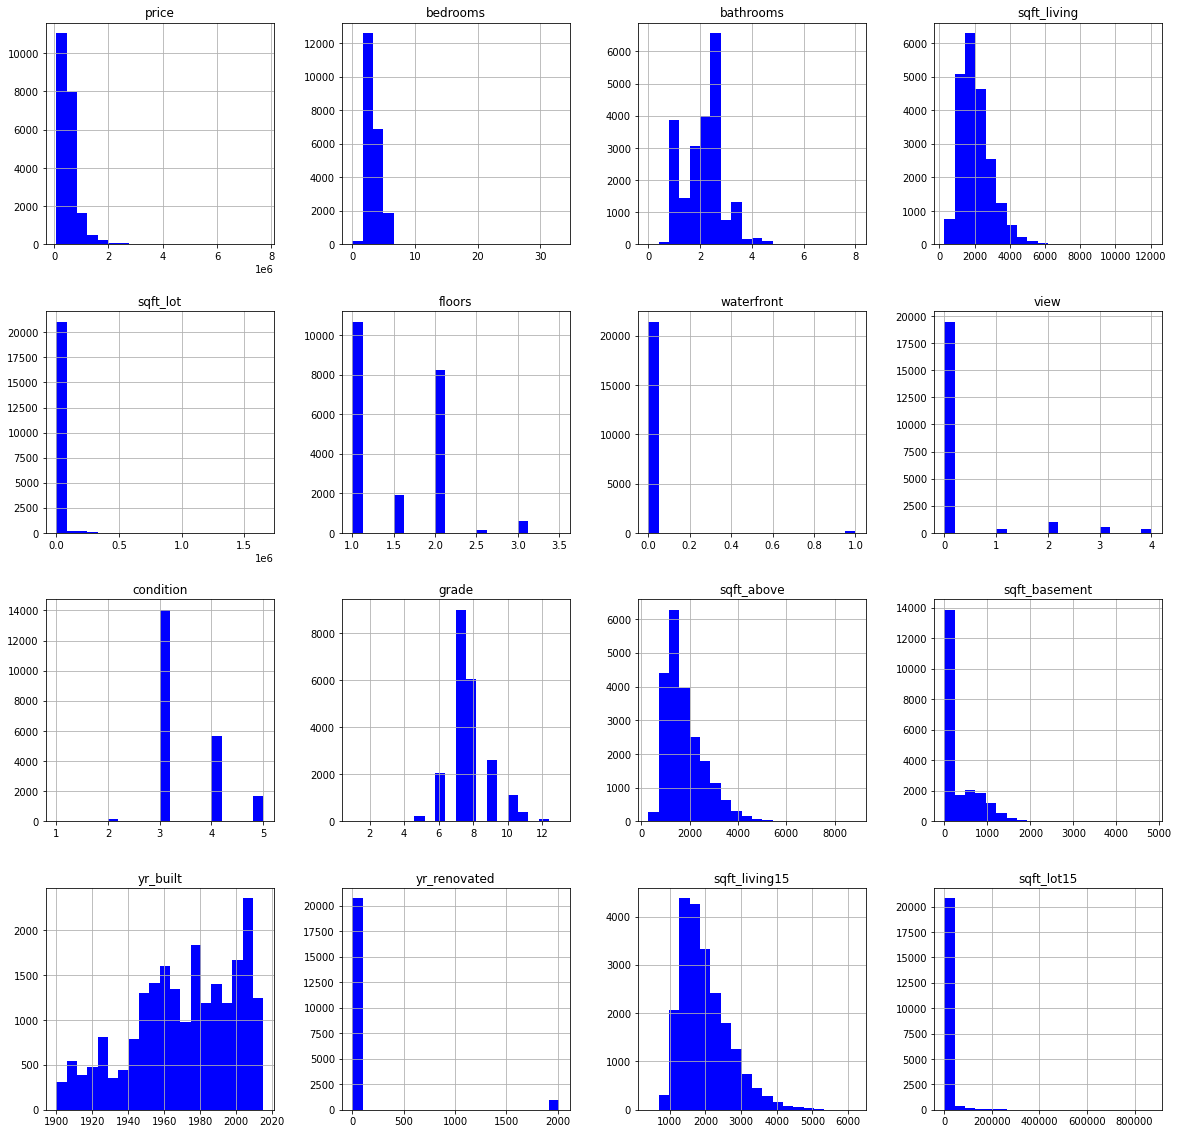

In [19]:
numeric_collumns.hist(bins=20, figsize=(20,20), color='blue')

In [20]:
features = ['bathrooms', 'bedrooms', 'grade', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_basement']

X = df[features]
X.head()

,bathrooms,bedrooms,grade,sqft_above,sqft_living,sqft_living15,sqft_basement
16768,2.25,3,9,1970,1970,2340,0
9596,2.50,3,9,1700,2600,2380,900
9587,2.50,5,8,2820,2820,2820,0
20602,2.50,4,8,3310,3310,2380,0
11577,2.25,4,8,1080,2160,1850,1080


In [21]:
y = df['price']
y = y.values.reshape(-1,1)

In [22]:
print(X.shape, y.shape)

(21612, 7) (21612, 1)


In [23]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [24]:
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split

# Trabalhando base classificacao
# divisão em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 5762)

In [25]:
X_train.shape, X_test.shape

((16209, 7), (5403, 7))

In [28]:
# importar o modelo Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# treinando o modelo 
forest = RandomForestRegressor(n_estimators = 10, random_state = 42).fit(X_train, np.ravel(y_train, order='C'))

In [30]:
y_pred = forest.predict(X_test)

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

def calculate_metrics(x_test, y_test_original, y_predict_original):
    n = len(X_test)
    k = X_test.shape[1]
    r2 = r2_score(y_test_original, y_predict_original)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_predict_original)),'.3f'))
    MSE = mean_squared_error(y_test_original, y_predict_original)
    MAE = mean_absolute_error(y_test_original, y_predict_original)
    r2 = r2_score(y_test_original, y_predict_original)
    adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

    print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

In [34]:
y_pred = y_pred.reshape(-1, 1)

y_predict_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

In [36]:
def plot_result_comparison(y_test, y_predict):
    plt.plot(y_test, y_predict, "^", color='red')
    plt.xlabel('Model predictions')
    plt.ylabel('True values')

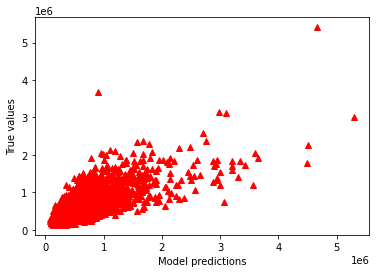

In [37]:
plot_result_comparison(y_test_original, y_predict_original)

In [38]:
# importar biblioteca para calculo de métricas
from sklearn import metrics  

# calculando medidas de erro
# essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
print('R2:', metrics.r2_score(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))) 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

R2: 0.5721467254376916
MSE: 0.001027249196809572
RMSE: 0.03205072849109006
RMSLE: 0.02793481397303051
MAE: 0.020279603316647552


In [39]:
features = [
    'bathrooms', 'bedrooms', 'condition', 'grade', 
    'sqft_above', 'sqft_basement', 'sqft_living', 
    'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 
    'waterfront', 'yr_built', 'yr_renovated']

X = df[features]
X.head()

,bathrooms,bedrooms,condition,grade,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated
16768,2.25,3,4,9,1970,0,1970,2340,35100,35100,0,0,1977,0
9596,2.50,3,4,9,1700,900,2600,2380,4750,4750,0,0,1951,0
9587,2.50,5,3,8,2820,0,2820,2820,67518,48351,0,0,1979,0
20602,2.50,4,3,8,3310,0,3310,2380,6500,5000,0,0,2012,0
11577,2.25,4,3,8,1080,1080,2160,1850,8119,9000,0,0,1966,0


In [41]:
y = df['price']

In [42]:
scaler = MinMaxScaler()

scaled_X = scaler.fit_transform(X)

scaled_y = scaler.fit_transform(y.values.reshape(-1,1))

In [46]:
# Trabalhando base classificacao
# divisão em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(scaled_X,
                                                    scaled_y,
                                                    test_size = 0.25,
                                                    random_state = 5762)

In [47]:
# treinando o modelo 
forest2 = RandomForestRegressor(n_estimators = 10, random_state = 42).fit(X_train, np.ravel(y_train, order='C'))

In [48]:
X_train.shape, X_test.shape

((16209, 14), (5403, 14))

In [50]:
y_pred2 = forest2.predict(X_test)

In [53]:
y_pred2 = y_pred2.reshape(-1, 1)

y_predict_original = scaler.inverse_transform(y_pred2)
y_test_original = scaler.inverse_transform(y_test)

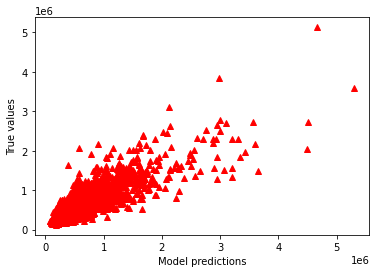

In [54]:
plot_result_comparison(y_test_original, y_predict_original)

In [56]:
# importar biblioteca para calculo de métricas
from sklearn import metrics  

# calculando medidas de erro
# essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
print('R2:', metrics.r2_score(y_predict_original, y_test_original)) 
print('MSE:', metrics.mean_squared_error(y_predict_original, y_test_original))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_predict_original, y_test_original))) 
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(y_predict_original, y_test_original))) 
print('MAE:', metrics.mean_absolute_error(y_predict_original, y_test_original))

R2: 0.6186745050277732
MSE: 37678744890.52499
RMSE: 194110.13598090387
RMSLE: 0.29598016550680173
MAE: 120368.28035562254


In [58]:
calculate_metrics(X_test, y_test_original, y_predict_original)

RMSE = 194110.136 
MSE = 37678744890.52499 
MAE = 120368.28035562254 
R2 = 0.7300795548648593 
Adjusted R2 = 0.7293782025575297
